# This is a test. 

___


## Obtaining

1. Sequencing coverage
2. Nucleotides frequencies
3. Most frequent nucleotides
4. The consensus sequence


## Saving all as a .csv file

In [ ]:
exec (open("/Users/markov/dengue/scripts/functions.py").read ())
refgenome_file = "/Users/markov/dengue/data/pDVWSK601-NGC virus.gb"
getting_cover_ntfreqs ("/Users/markov/dengue/data/twoway_noadapt6_rehead_sortindex.bam", "/Users/markov/dengue/data/denv_coverage_and_ntcounts_nopairs_noquality.csv", False, False)


In [47]:
counts_dataframe = pd.read_csv ("/Users/markov/dengue/data/denv_coverage_and_ntcounts2.csv")

correction = - getting_position_correction (refgenome_file, ''.join(counts_dataframe ['majorsequence']))
print (correction)

16138
-1846


Current figure size: [18.0, 8.0]


//anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


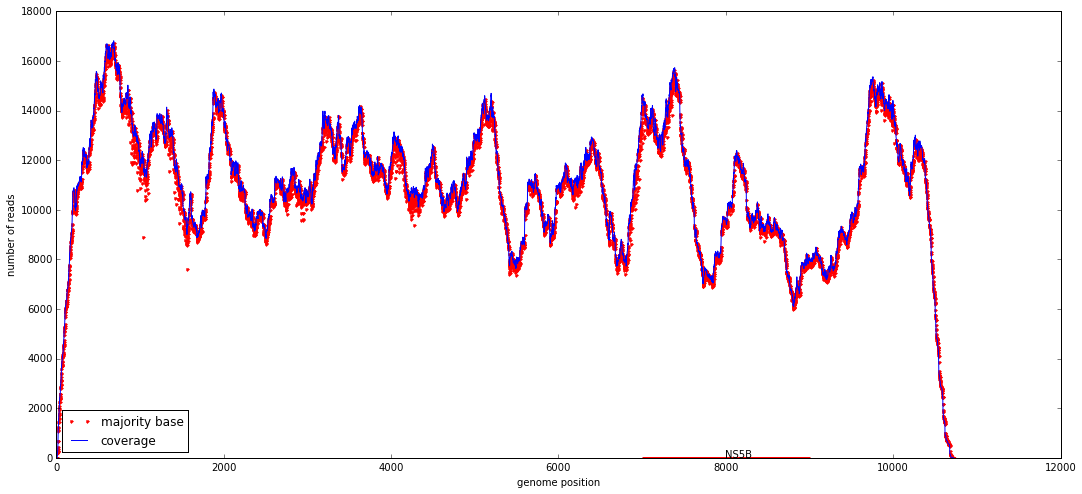

In [61]:

%matplotlib inline
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
plt.plot (counts_dataframe ['position'], counts_dataframe ['majorbases'], 'r.') #(position, coverage, 'r-')
plt.plot (counts_dataframe ['position'], counts_dataframe ['As'] + counts_dataframe ['Cs'] + counts_dataframe ['Gs'] + counts_dataframe ['Ts'] + counts_dataframe ['Ns'], 'b-') #(position, coverage, 'r-')
plt.xlabel ('genome position')
plt.ylabel ('number of reads')
plt.hlines(30, 7000, 9000, colors='r', linestyles='solid')
plt.text(8000,20,'NS5B',rotation=0)
fig_size = rcParams["figure.figsize"]
print ("Current figure size:", fig_size)
plt.legend (['majority base', 'coverage'], loc = 'lower left')

Current figure size: [18.0, 8.0]


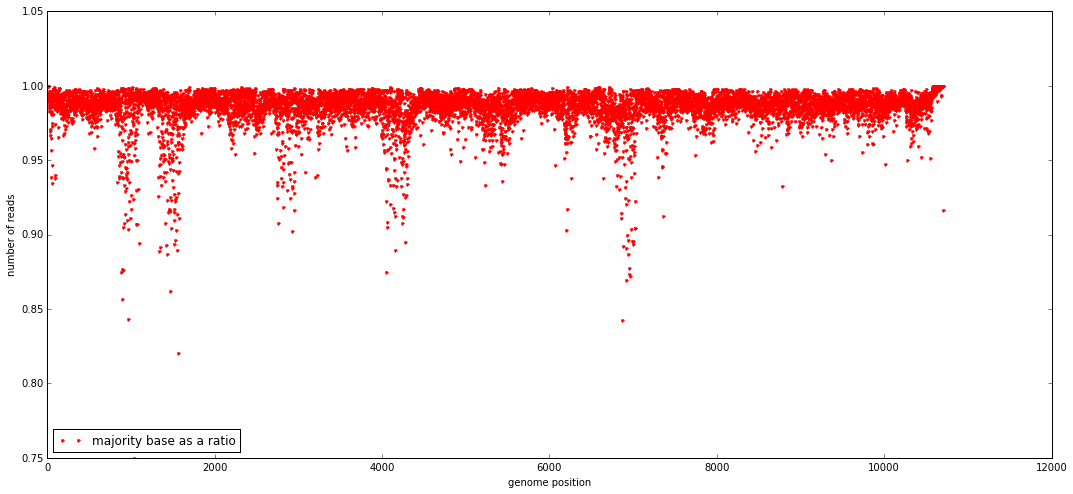

In [62]:
majorbase_ratio = list ()
coverage = counts_dataframe ['As'] + counts_dataframe ['Cs'] + counts_dataframe ['Gs'] + counts_dataframe ['Ts'] + counts_dataframe ['Ns']
majorbases = counts_dataframe ['majorbases']
for x in range (len(coverage)):
    majorbase_ratio.append (majorbases [x]/coverage[x])
    
def ratio(x,y):
    return x/y

majorbase_ratio = list(map(ratio, majorbases, coverage))

%matplotlib inline
rcParams['figure.figsize'] = 18, 8
plt.plot (counts_dataframe ['position'], majorbase_ratio, 'r.') #(position, coverage, 'r-')
plt.xlabel ('genome position')
plt.ylabel ('number of reads')
fig_size = rcParams["figure.figsize"]
print ("Current figure size:", fig_size)
plt.legend (['majority base as a ratio', 'coverage'], loc = 'lower left')

Current figure size: [18.0, 8.0]


//anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


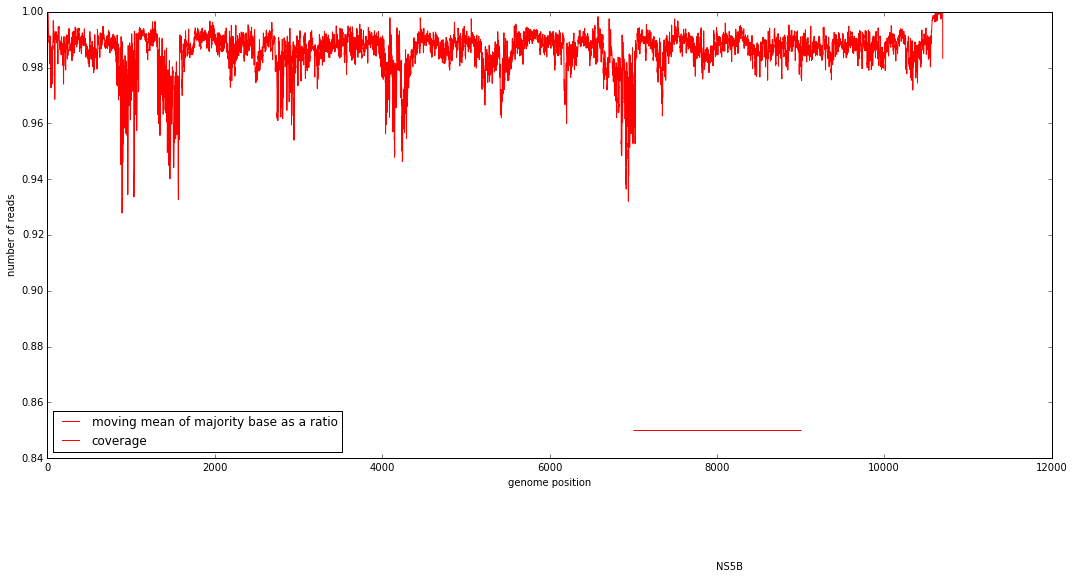

In [63]:
moving_average = (runningMeanFast (majorbase_ratio, 5))
%matplotlib inline
rcParams['figure.figsize'] = 18, 8
plt.plot (counts_dataframe ['position'], moving_average, 'r-') #(position, coverage, 'r-')
plt.xlabel ('genome position')
plt.ylabel ('number of reads')
plt.hlines(0.85, 7000, 9000, colors='r', linestyles='solid') #, label='NS5B')
plt.text(8000,0.8,'NS5B',rotation=0)
fig_size = rcParams["figure.figsize"]
print ("Current figure size:", fig_size)
plt.legend (['moving mean of majority base as a ratio', 'coverage'], loc = 'lower left')

# Title

In [76]:
import sys
annotations = '/Users/markov/dengue/data/ref_geno_anottation_relabel.gff'

try:
    f= open (annotations, 'r')
except IOError:
    print ("Unknown file " + annotations)
    sys.exit()
    
line = ""
annots_list = list ()
line_list = list ()
for l in f:
    if ('CDS' in l or 'UTR' in l) and 'DEN2' not in l and 'Beta-lactamase' not in l:
        line_list = l.split()
        annots_list.append (make_annotation (line_list [12], line_list [3], line_list [4], correction))
#        print (l)
#        print (line_list)
annots_list.sort (key=lambda x: x.start)
print (annots_list)
#print (annots_list [0].name)
#print (annots_list [0].start)
            

f.close()

[5UTR: 1 to 96, "Capsid": 97 to 438, "SP\prM": 397 to 438, "prM": 439 to 936, "M\(mature\form)": 712 to 936, E: 937 to 2421, "NS1": 2422 to 3477, "NS2A": 3478 to 4131, "NS2B": 4132 to 4521, "NS3": 4522 to 6375, "NS4A": 6376 to 6825, "NS4B": 6826 to 7569, "NS5": 7570 to 10272, 3UTR: 10273 to 10723]


Current figure size: [18.0, 8.0]


//anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


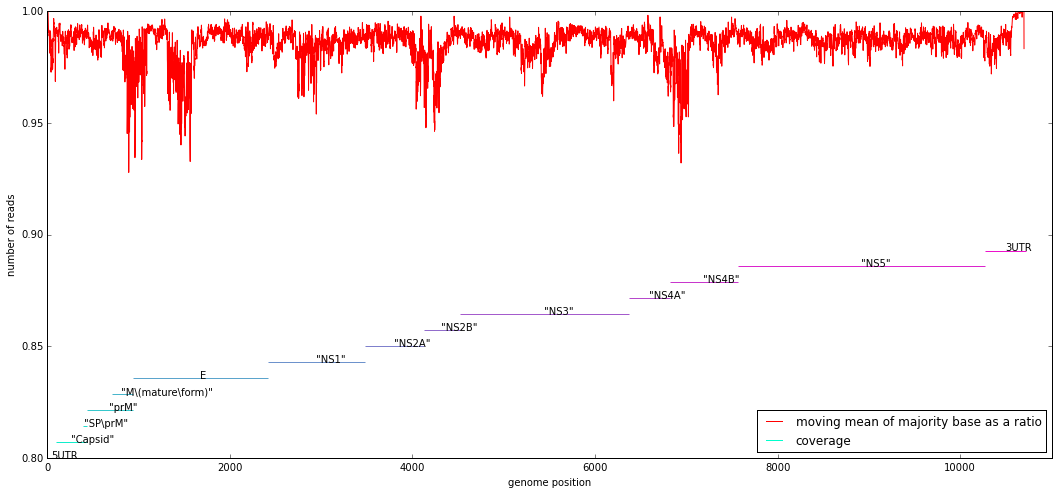

In [77]:
moving_average = (runningMeanFast (majorbase_ratio, 5))
%matplotlib inline
rcParams['figure.figsize'] = 18, 8
plt.plot (counts_dataframe ['position'], moving_average, 'r-') #(position, coverage, 'r-')
plt.xlabel ('genome position')
plt.ylabel ('number of reads')
plt.axis ([0, 11000, 0.8, 1])
color = 0.0
for gene in annots_list:
    plt.hlines((color/10)+ 0.8, gene.start, gene.end, colors= (0+color, 1-color, 0.8, 1), linestyles='solid') #, label='NS5B')
    plt.text( (gene.start + gene.end)/2, (color/10)+ 0.8, gene.name, rotation=0)
    color += 1/len(annots_list)
fig_size = rcParams["figure.figsize"]
print ("Current figure size:", fig_size)
plt.legend (['moving mean of majority base as a ratio', 'coverage'], loc = 'lower right')

In [78]:
codonpos1, codonpos2, codonpos3 = determin_codon_posit(annots_list[2], majorbase_ratio)


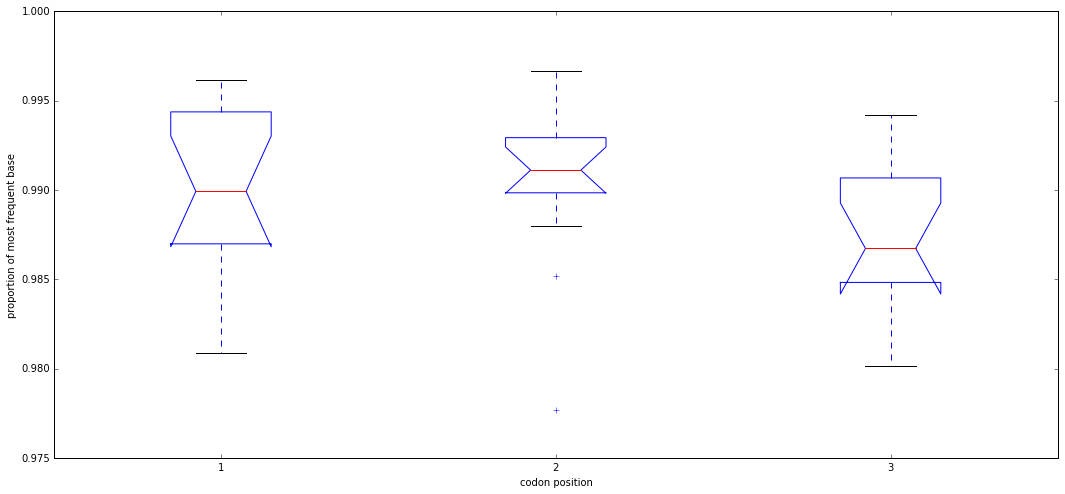

In [79]:
%matplotlib inline
rcParams['figure.figsize'] = 18, 8
plt.xlabel ('codon position')
plt.ylabel ('proportion of most frequent base')
#plt.axis ([0, 11000, 0.8, 1])
plt.boxplot([codonpos1, codonpos2, codonpos3], 1)
None # this removes lots of unwanted output that matplotlib throws out.


10723


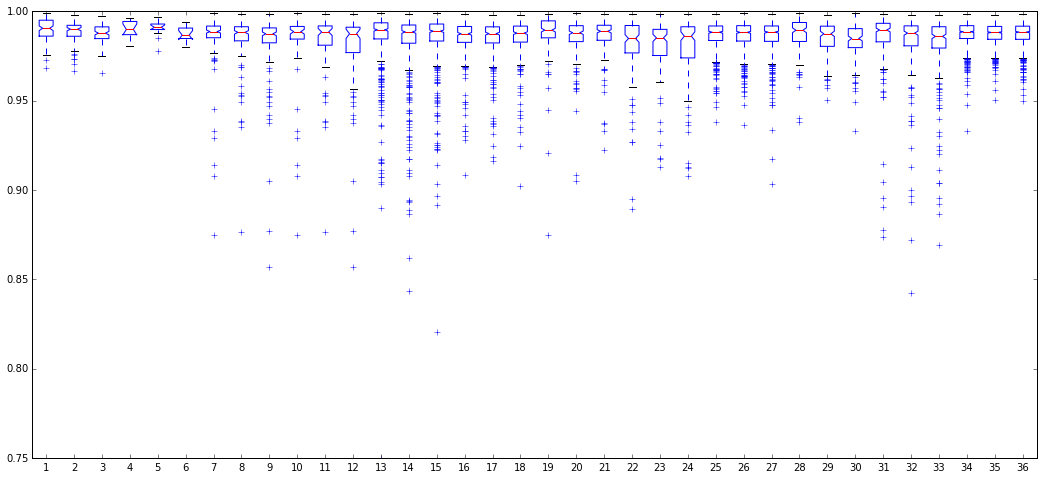

In [80]:
geneslist = list()
print (len(majorbase_ratio))
for x in annots_list:
    
    if x.start>0 and x.end< len(majorbase_ratio) and 'UTR' not in x.name:
        list1, list2, list3 = determin_codon_posit(x, majorbase_ratio)
        geneslist.append (list1)
        geneslist.append (list2)
        geneslist.append (list3)

%matplotlib inline
rcParams['figure.figsize'] = 18, 8
#plt.xlabel ('genome position')
#plt.ylabel ('number of reads')
#plt.axis ([0, 11000, 0.8, 1])
plt.boxplot(geneslist, 1)
None